# Redes neuronales recurrentes

## Parte 1.- Pre-procesado de datos

In [21]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

### Importamos datos de entrenamiento

In [22]:
data_train = pd.read_csv("Google_Stock_Price_Train.csv")

In [23]:
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [24]:
training_set = data_train.iloc[:,1:2].values #iloc enbase a pos, loc a nombre

In [25]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Escalado de caracteristicas
Por lo general para el escalado usamos la normalziación
x-min(x)/(max(x)-min(x))

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
sc = MinMaxScaler(feature_range=(0,1))

In [28]:
training_set_scaled = sc.fit_transform(training_set) #fit obtiene minimo y maximo, la formula, y el transform aplica la formula

In [29]:
training_set_scaled.shape

(1258, 1)

In [30]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Estructura con 60 time steps y 1 salida, es decir, verá 60 días atras y predecirá el día siguiente

In [31]:
X_train = []
y_train = []
for i in range(60,1258):
    #del 0 al 59, y la y que va a predecir es la 60, luego del 1 al 60, etc
    X_train.append(training_set_scaled[i-60:i,0])
    #el 60 
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [32]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [34]:
print(X_train[0].shape)
print(y_train[0])

(60,)
0.08627874097775134


### Ahora mismo tenemos una matriz en el conjunto de entrenamiento, donde va en la primera columna del 0 al 59, luego del 1 al 60, etc. Sin embargo, se podrían añadir mas datos en un nivel de profundidadd (otra dimensión), esto con el fin de obtener un mejor resultado

### Redimensionar los datos

In [48]:
#Solo necesitamos hacerlos en el conjunto de entrenamiento
#Redimensionamos 
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))# 1 dato en la tercera dimension
print(X_train[0].shape)

(60, 1)


In [49]:
X_train.shape

(1198, 60, 1)

In [50]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout #dropout regularizqa el overfiting

In [62]:
regresor = Sequential() #es una regresion, no una clasificación

In [63]:
#Los 3 básicos de LSTM, 50 neuronas por capa, True porque quiero agregar mas capas, ña ultima debe ser falsehood
regresor.add(LSTM(units=50,return_sequences=True,input_shape = (X_train.shape[1],1) ))

In [64]:
#Se desactivan unas aleatoriamente para prevenir overfiting, 20%
regresor.add(Dropout(0.2))

In [65]:
regresor.add(LSTM(units=50,return_sequences=True ))
regresor.add(Dropout(0.2))

In [66]:
regresor.add(LSTM(units=50,return_sequences=True ))
regresor.add(Dropout(0.2))

In [67]:
#Capa final de LSTM
regresor.add(LSTM(units=2,return_sequences=False ))
regresor.add(Dropout(0.2))

In [68]:
#Capa de salida
regresor.add(Dense(units=1))

## Compilar la red neuronal


In [69]:
#Como es un problema de regresion el optimizador no sera el mismo 
regresor.compile(optimizer='adam', loss='mean_squared_error')

### Ajustar la red neuronal al conjunto de entrenamiento

In [70]:
#100 iteraciones, de 32 datos
regresor.fit(X_train, y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 12s 67ms/step - loss: 0.0798
Epoch 2/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0418
Epoch 3/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0341
Epoch 4/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0296
Epoch 5/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0319
Epoch 6/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0269
Epoch 7/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0282
Epoch 8/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0226
Epoch 9/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0206
Epoch 10/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0209
Epoch 11/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0196
Epoch 12/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0207
Epoch 13/100
38/38 [====

38/38 [==============================] - 3s 72ms/step - loss: 0.0084


In [72]:
data_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [73]:
data_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [74]:
real_stock_price = data_test.iloc[:,1:2].values

In [75]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [76]:
real_stock_price.shape

(20, 1)

# Predecir las acciones de 2017 de google

In [77]:
#Necesitamos los 60 dias anteriores de 2016, ya que así lo hemos estado trabajando, para obtener los días correlativos
#Concatenamos los 2 datasets
#Podemos concatenar solo una fila
dataset_total = pd.concat((data_train['Open'], data_test['Open']),axis=0) # 0 para columnas

In [80]:
dataset_total.head()

0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
Name: Open, dtype: float64

In [87]:
#1258-20, limite inferior, ultimo día de 2016 -60, 60 días antes
inputs = dataset_total[len(dataset_total)-len(data_test)-60:].values # de ahí en adelante
#ahora tenemos los ultimos 60 días de 2016 y los de 2017

In [89]:
inputs.shape

(80,)

In [90]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [97]:
#reshape -1,1 cambia  de fila a columna
inputs= inputs.reshape(-1,1) #deja la segunda como está, y añade una nueva dimension

In [99]:
inputs.shape

(80, 1)

In [98]:
#No hacemos un fit porque ya tenemos minomo y maximo
inputs = sc.transform(inputs)

In [100]:
X_test = []
for i in range(60,80): #20 días a predecir
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [102]:
X_test.shape

(20, 60, 1)

In [104]:
predicted_stock_price = regresor.predict(X_test)
#Revertimos el escalado
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [105]:
predicted_stock_price

array([[764.20374],
       [762.73663],
       [761.67737],
       [761.49756],
       [762.68463],
       [765.55695],
       [769.3318 ],
       [772.514  ],
       [774.3182 ],
       [774.76825],
       [774.3931 ],
       [773.7858 ],
       [773.38605],
       [773.52057],
       [774.17993],
       [776.09283],
       [779.45215],
       [783.85864],
       [787.868  ],
       [789.08545]], dtype=float32)

In [106]:
predicted_stock_price.shape

(20, 1)

In [107]:
pd.DataFrame(predicted_stock_price).head(5)

,0
0,764.203735
1,762.736633
2,761.677368
3,761.497559
4,762.684631


# Comparamos el precio real con la predicción

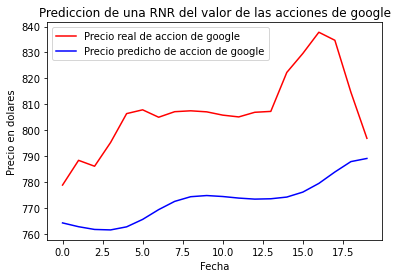

In [112]:
plt.plot(real_stock_price,color='red',label='Precio real de accion de google')
plt.plot(predicted_stock_price,color='blue',label='Precio predicho de accion de google')
plt.title('Prediccion de una RNR del valor de las acciones de google')
plt.xlabel('Fecha')
plt.ylabel('Precio en dolares')
plt.legend()
plt.show()